In [2]:
# imports and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset 
df = pd.read_csv('data/dataset_updated.csv', encoding='latin-1')


In [25]:
df_num = df.drop(["Season", "Name", "Player", "Nation", "Club", "Pos", "Gen Pos", "League"], axis=1)

In [4]:
df.columns

Index(['Season', 'Name', 'Weekly Gross', 'Annual Gross', 'Total Gross',
       'Weekly Net', 'Annual Net', 'Ln Annual Net', 'Gen Pos', 'Club',
       ...
       'On-Off.1', '2CrdY', 'Fls Comm', 'Fls Drawn', 'PKwon', 'PKcon', 'OG',
       'Recov', 'Aerials Won', 'Won%'],
      dtype='object', length=161)

In [5]:
df_reduced = df[['Season', 'Weekly Gross', 'Transfer In', 'Age', 'Gls', 'Ast']]

In [6]:
df_reduced.head()

,Season,Weekly Gross,Transfer In,Age,Gls,Ast
0,22/23,26929,0,25,0,0
1,19/20,11987,0,25,1,2
2,20/21,23973,0,26,2,1
3,21/22,24137,0,28,0,3
4,22/23,23865,0,29,1,1


In [7]:
#integer encoding
label_encoder = LabelEncoder() 
column_to_encode = df_reduced["Season"]
encoded_column = label_encoder.fit_transform(column_to_encode)
df_reduced["Season"] = encoded_column

C:\Users\barry\AppData\Local\Temp\ipykernel_22764\2871092885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced["Season"] = encoded_column


In [8]:
df_reduced.head()

,Season,Weekly Gross,Transfer In,Age,Gls,Ast
0,4,26929,0,25,0,0
1,1,11987,0,25,1,2
2,2,23973,0,26,2,1
3,3,24137,0,28,0,3
4,4,23865,0,29,1,1


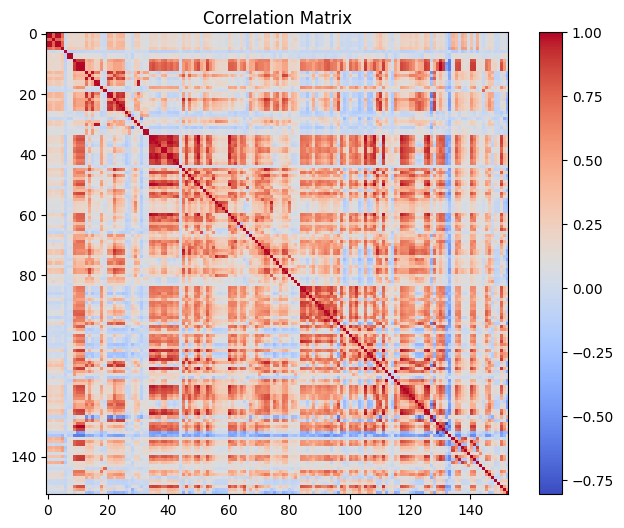

In [27]:
corr_matrix = df_num.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
# plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


In [10]:
x = df_reduced.drop("Weekly Gross", axis=1)
y = df[["Weekly Gross"]]

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly Gross   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     74.74
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.35e-70
Time:                        15:29:14   Log-Likelihood:                -19874.
No. Observations:                1626   AIC:                         3.976e+04
Df Residuals:                    1620   BIC:                         3.979e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.94e+04   8073.571     -3.642      

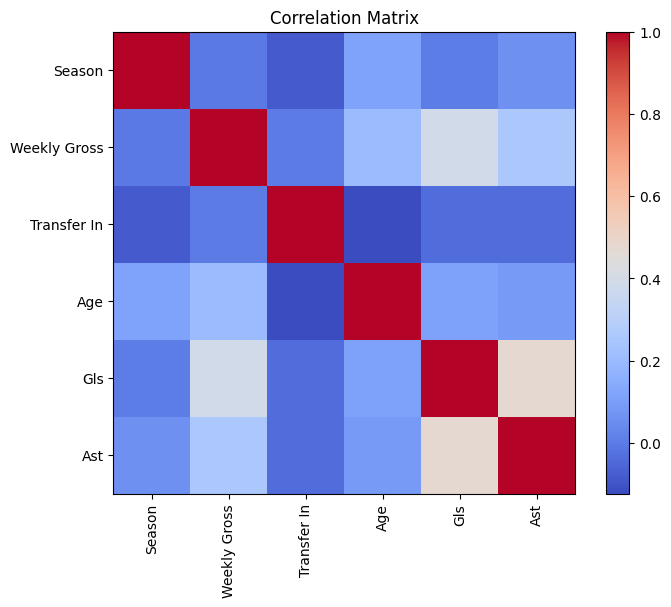

In [11]:
corr_matrix = df_reduced.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()